# Chapter 3: Likelihood functions-Sandstone

## Data Management


In this example we will show how we can import data from a csv and generate a model with several depositional series.

In [1]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../")

# Importing gempy
import gempy as gp

# Embedding matplotlib figures into the notebooks
%matplotlib notebook

# Aux imports
import numpy as np
import pandas as pn

In this case instead loading a geo_data object directly, we will create one. The main atributes we need to pass are:
- Extent: X min, X max, Y min, Y max, Z min, Z max
- Resolution: X,Y,Z

Additionaly we can pass the address to csv files (GeoModeller3D format) with the data.

In [2]:
# Importing the data from csv files and settign extent and resolution
# [696000-10000,747000 + 20600,6863000 - 20600,6950000 + 20600,-20000, 600]
# 7.050000e+05, 6863000),  747000 - 7.050000e+05, 6925000 - 6863000
geo_data = gp.create_data([7.050000e+05-20600,747000 + 20600,6863000 - 20600,6925000 + 20600,-20000, 600],
                          [85,125,51],
                         path_f = os.pardir+"/input_data/a_Foliations.csv",
                         path_i = os.pardir+"/input_data/a_Points.csv")

In [3]:

geo_data.interfaces['Z_std'] = 0
geo_data.interfaces['Y_std'] = 0
geo_data.interfaces['X_std'] = 0


geo_data.interfaces.set_value(geo_data.interfaces['formation'] == 'EarlyGranite', 'Z_std', 500)
geo_data.interfaces.set_value(geo_data.interfaces['formation'] == 'SimpleMafic2', 'Z_std', 750)
geo_data.interfaces.set_value(geo_data.interfaces['formation'] == 'SimpleBIF', 'Z_std', 1500)
geo_data.interfaces.set_value(geo_data.interfaces['formation'] == 'SimpleMafic1', 'Z_std', 1500)

geo_data.foliations['dip_std'] = 10
geo_data.foliations['azimuth_std'] = 10
gp.get_data(geo_data, verbosity=3).head()

G_x  G_y  G_z       X X_std            Y Y_std        Z Z_std  \
interfaces 0  NaN  NaN  NaN  735485     0  6.89194e+06     0 -1819.32   750   
           1  NaN  NaN  NaN  719018     0  6.89222e+06     0  508.179   750   
           2  NaN  NaN  NaN  716850     0  6.88736e+06     0  508.982   750   
           3  NaN  NaN  NaN  732699     0  6.88504e+06     0  494.526   750   
           4  NaN  NaN  NaN  727316     0  6.88646e+06     0  478.254   750   

                                   annotations azimuth azimuth_std  dip  \
interfaces 0  ${\bf{x}}_{\alpha \,{\bf{1}},0}$     NaN         NaN  NaN   
           1  ${\bf{x}}_{\alpha \,{\bf{1}},1}$     NaN         NaN  NaN   
           2  ${\bf{x}}_{\alpha \,{\bf{1}},2}$     NaN         NaN  NaN   
           3  ${\bf{x}}_{\alpha \,{\bf{1}},3}$     NaN         NaN  NaN   
           4  ${\bf{x}}_{\alpha \,{\bf{1}},4}$     NaN         NaN  NaN   

             dip_std     formation formation number isFault order_series  \
interfaces 0     NaN  SimpleMafic2                1   False            1   
           1     NaN  SimpleMafic2                1   False            1   
           2     NaN  SimpleMafic2                1   False            1   
           3     NaN  SimpleMafic2                1   False            1   
           4     NaN  SimpleMafic2                1   False            1   

             polarity         series  
interfaces 0      NaN  Default serie  
           1      NaN  Default serie  
           2      NaN  Default serie  
           3      NaN  Default serie  
           4      NaN  Default serie

In [6]:
geo_data.interfaces.min()

X                                             697047
Y                                        6.86921e+06
Z                                           -8458.17
formation                               EarlyGranite
series                                 Default serie
order_series                                       1
isFault                                        False
formation number                                   1
annotations         ${\bf{x}}_{\alpha \,{\bf{1}},0}$
Z_std                                            500
Y_std                                              0
X_std                                              0
dtype: object

'You can visualize the points in 3D (work in progress)

Or a projection in 2D:

## Computing the model

<IPython.core.display.Javascript object>


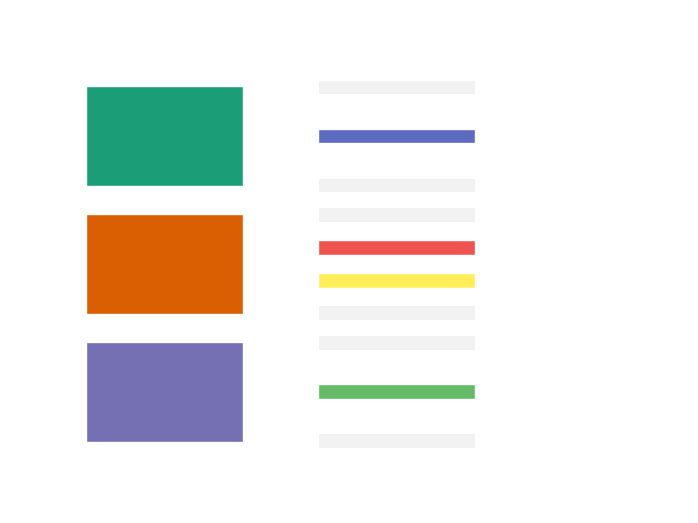

In [4]:
# Assigning series to formations as well as their order (timewise)
gp.set_series(geo_data, {"EarlyGranite_Series": 'EarlyGranite', 
                              "BIF_Series":('SimpleMafic2', 'SimpleBIF'),
                              "SimpleMafic_Series":'SimpleMafic1'}, 
                      order_series = ["EarlyGranite_Series",
                                      "BIF_Series",
                                      "SimpleMafic_Series"],
                      order_formations= ['EarlyGranite', 'SimpleMafic2', 'SimpleBIF', 'SimpleMafic1'],
              verbose=1)

Now as in the previous chapter we just need to create the interpolator object and compute the model.

In [5]:
interp_data = gp.InterpolatorInput(geo_data, output='gravity')

Level of Optimization:  fast_run
Device:  cpu
Precision:  float32


<IPython.core.display.Javascript object>


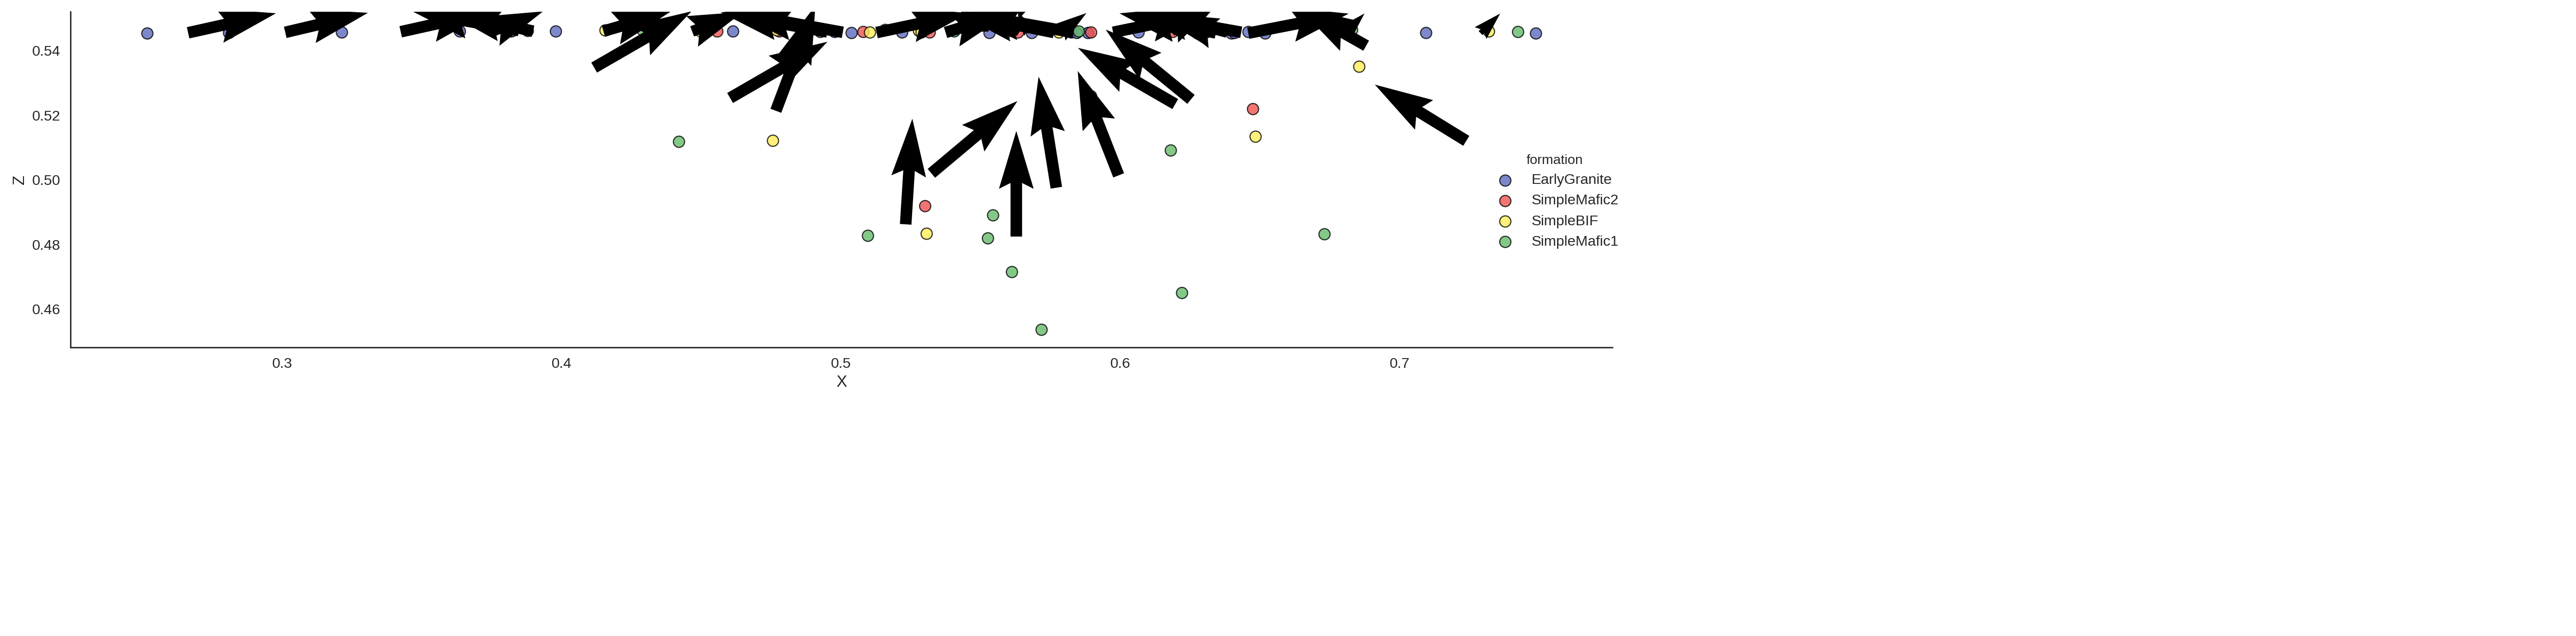

In [7]:
gp.plot_data(interp_data.geo_data_res)

In [26]:
gp.plot_data_3D(interp_data.geo_data_res)

In [11]:
interp_data.geo_data_res.grid.grid[:,2].max() - interp_data.geo_data_res.grid.grid[:,2].min()

0.21210217971026424

In [6]:
gp.set_geophysics_obj(interp_data,  [7.060000e+05,746000,6864000,6924000,-20000, 200],
                                             [21, 31], range_max=None) # X, Y

In [7]:
gp.precomputations_gravity(interp_data, 25, [2.92, 3.1, 2.92, 2.61, 2.61]);

In [23]:
a = interp_data.interpolator.tg.select.get_value()
a.nbytes

352760625

In [8]:
lith_block, fault_block, grav_plane = gp.compute_model(interp_data, output='gravity')

Now if we analyse the results we have a 3D array where the axis 0 represent the superposition of the series (potential fields). The color coding is working process yet.

<IPython.core.display.Javascript object>


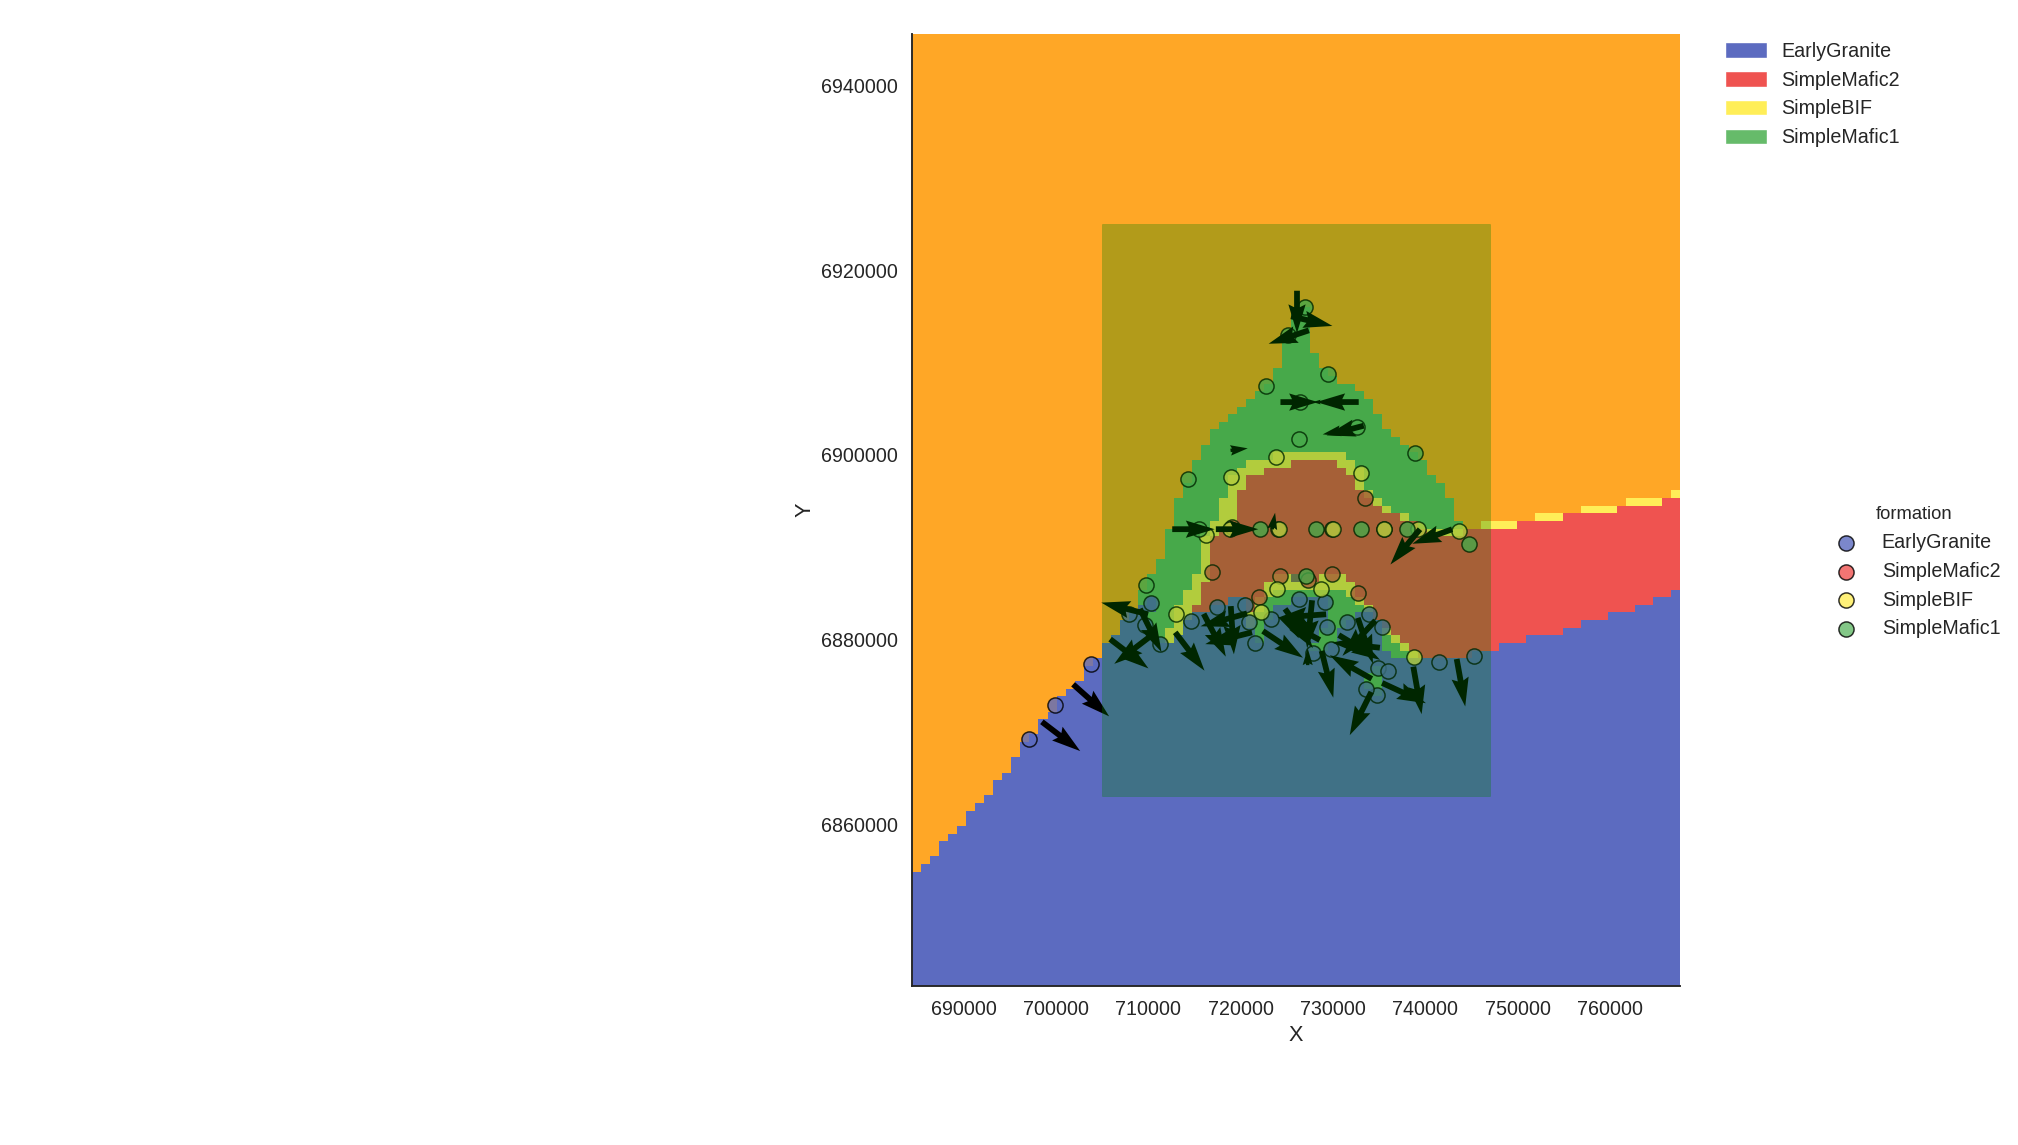

In [10]:
import matplotlib.pyplot as plt

gp.plot_section(geo_data, lith_block[0], -1, plot_data=True, direction='z')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

from matplotlib.patches import Rectangle

currentAxis = plt.gca()

currentAxis.add_patch(Rectangle((7.050000e+05, 6863000),  747000 - 7.050000e+05, 6925000 - 6863000,
                      alpha=0.3, fill='none', color ='green' ))

<IPython.core.display.Javascript object>


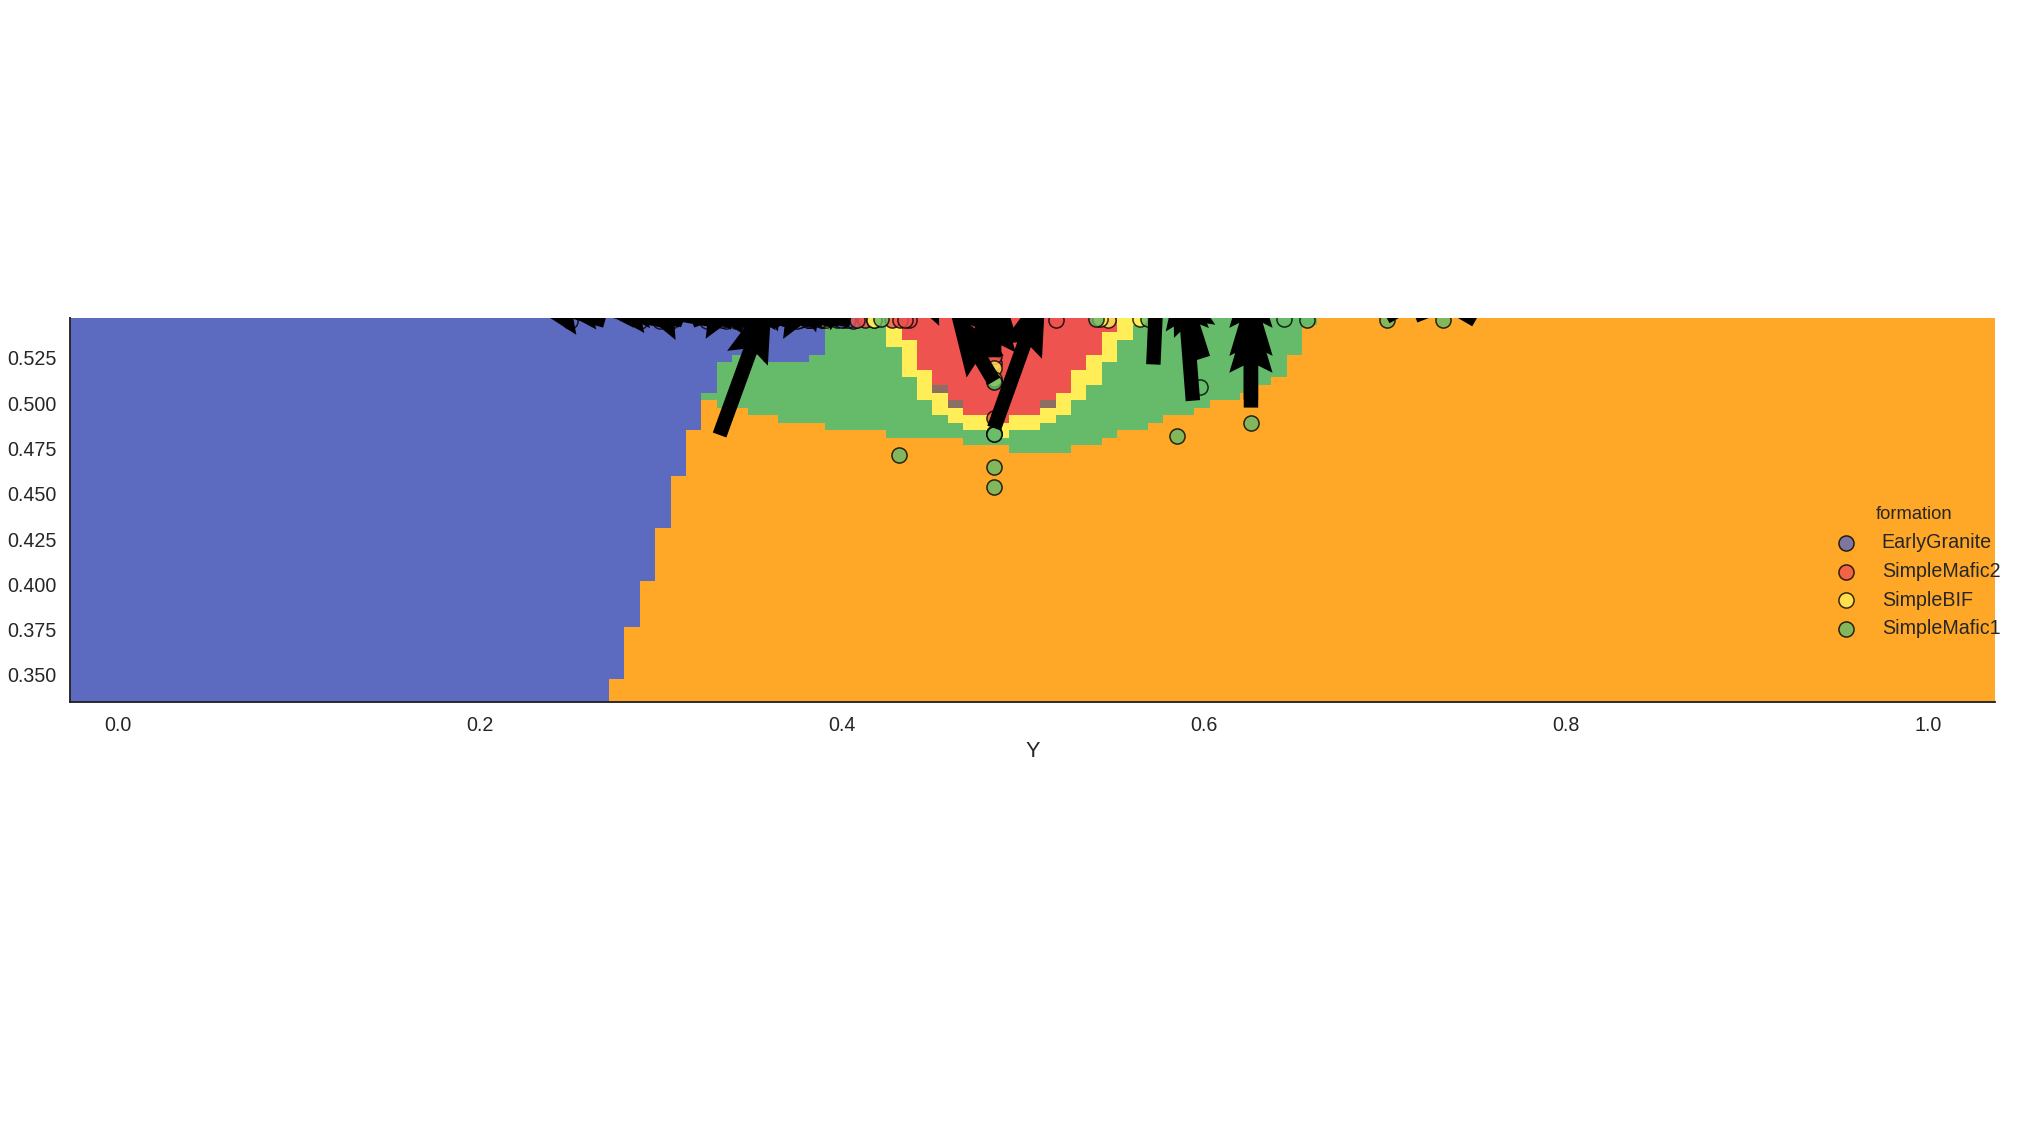

In [24]:
%matplotlib notebook
gp.plot_section(interp_data.geo_data_res, lith_block[0],40, plot_data=True, direction='x')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

And the axis 2 keeps the faults network that in this model since there is not faults does not represent anything.

Additionally with can export the blocks to vtk in order to visualize them in Paraview. We are working in visualization in place as well.

In [11]:
#ver, sim = gp.get_surfaces(interp_data, lith_block[1], None, original_scale=False)

In [12]:
#gp.plot_surfaces_3D_real_time(interp_data, ver, sim, alpha=1)

In [9]:
plt.imshow(grav_plane.reshape(31,21), origin='lower')

NameError: name 'plt' is not defined

<IPython.core.display.Javascript object>


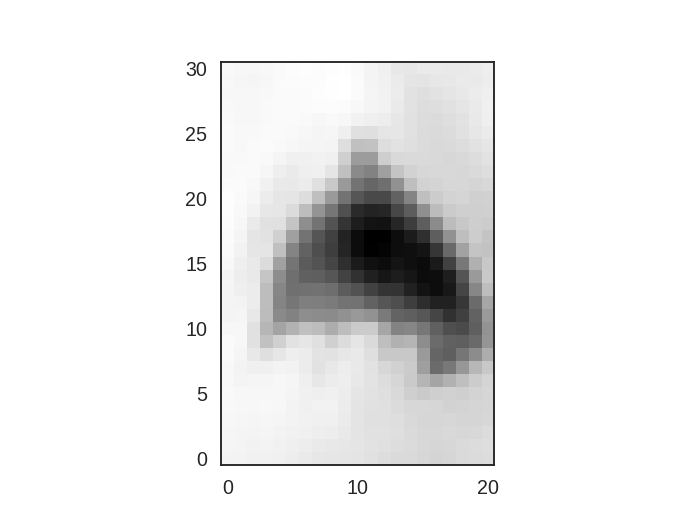

In [11]:
a = pn.read_csv('../input_data/Sst_grav_2000.xyz', header=None, delim_whitespace=True)

ori_grav = a[3].as_matrix().reshape(-1, 21)

plt.imshow(a[3].as_matrix().reshape(-1, 21), origin='lower')

In [27]:
import sys
sys.getsizeof(interp_data.interpolator.tg.tz.get_value())

105857920

In [16]:
sys.getsizeof(interp_data.interpolator.tg.select.get_value().astype(bool))

81375096

In [12]:
import pymc
interface_Z_stoch = []
foliations_dip_stoch = []
foliations_azimuth_stoch = []

# We rescale the standard deviation
# std = 20./interp_data.rescaling_factor

# loop over the unique group id's and create a pymc.Normal distribution for each
for ind, i in interp_data.geo_data_res.interfaces.iterrows():
    stoch = pymc.Normal(i['formation']+str(ind)+'_stoch', i['Z'], 1./i['Z_std']**2)
    interface_Z_stoch.append(stoch)
    
for ind, i in interp_data.geo_data_res.foliations.iterrows():
    stoch = pymc.Normal(i['formation']+str(ind)+'_d_stoch', i['dip'], 1./i['dip_std']**2)
    foliations_dip_stoch.append(stoch)
    
for ind, i in interp_data.geo_data_res.foliations.iterrows():
    stoch = pymc.Normal(i['formation']+str(ind)+'_a_stoch', i['azimuth'], 1./i['azimuth_std']**2)
    foliations_azimuth_stoch.append(stoch)

In [13]:
import copy
# First we extract from our original intep_data object the numerical data that is necessary for the interpolation.
# geo_data_stoch is a pandas Dataframe

# This is the inital model so it has to be outside the stochastic frame
geo_data_stoch_init = copy.deepcopy(interp_data.geo_data_res)

In [14]:
@pymc.deterministic(trace=True)
def input_data(value = 0, 
               interface_Z_modifier = interface_Z_stoch,
               geo_data_stoch_init = geo_data_stoch_init,
               foliations_dip_stoch = foliations_dip_stoch,
               foliations_azimuth_stoch = foliations_azimuth_stoch,
               verbose=0):
    # First we extract from our original intep_data object the numerical data that is necessary for the interpolation.
    # geo_data_stoch is a pandas Dataframe
    geo_data_stoch = gp.get_data(geo_data_stoch_init, numeric=True)

#     geo_data_stoch_i = gp.get_data(geo_data_stoch_init, 'interfaces', numeric=True)
#     geo_data_stoch_f = gp.get_data(geo_data_stoch_init, 'foliations', numeric=True)

   
    geo_data_stoch.xs('interfaces')['Z'] = np.array(interface_Z_modifier)
    geo_data_stoch.xs('foliations')['dip'] = np.array(foliations_dip_stoch)
    geo_data_stoch.xs('foliations')['azimuth'] = np.array(foliations_azimuth_stoch)
        
#     geo_data_stoch_i['Z'] = np.array(interface_Z_modifier)
#     geo_data_stoch_f['dip'] = np.array(foliations_dip_stoch)
#     geo_data_stoch_f['dip'] = np.array(foliations_dip_stoch)
        
    if verbose > 0:
        print(geo_data_stoch)
        
    # then return the input data to be input into the modeling function. Due to the way pymc2 stores the traces
    # We need to save the data as numpy arrays
    return [geo_data_stoch.xs('interfaces')[["X", "Y", "Z"]].values, geo_data_stoch.xs('foliations').values]

In [15]:
@pymc.deterministic(trace=False)
def gempy_model(value=0,
                input_data=input_data, verbose=False):

    # modify input data values accordingly
    interp_data.geo_data_res.interfaces[["X", "Y", "Z"]] = input_data[0]

    # Gx, Gy, Gz are just used for visualization. The theano function gets azimuth dip and polarity!!!
    interp_data.geo_data_res.foliations[["G_x", "G_y", "G_z", "X", "Y", "Z", 'azimuth', 'dip', 'polarity']] = input_data[1]

    try:
        # try to compute model
        lb, fb, grav = gp.compute_model(interp_data, output='gravity')
        if False:
            gp.plot_section(interp_data.geo_data_res, lb[0], 19, plot_data=True)
           # gp.plot_data(interp_data.geo_data_res, direction='y')

        return lb, fb, grav

    except np.linalg.linalg.LinAlgError as err:
        # if it fails (e.g. some input data combinations could lead to
        # a singular matrix and thus break the chain) return an empty model
        # with same dimensions (just zeros)
        if verbose:
            print("Exception occured.")
        return np.zeros_like(lith_block), np.zeros_like(fault_block), np.zeros_like(grav_block)

In [16]:
@pymc.deterministic
def e_sq(value = ori_grav, model_grav = gempy_model[2], verbose = 0):
   
    Forw = model_grav.reshape(31,21)
    #print np.median(value),np.median(Forw)
    # shifting
   # shift = np.median(-value)-np.median(Forw)
    shift = -450-np.median(Forw)#np.median(value)-np.median(Forw)
    #Forw = X_train_minmax = min_max_scaler.fit_transform(Forw, feature_range=(0, 10))
    
    
 
    # Calibration parameters
    F_min, F_max =  np.min(Forw), np.max(Forw)   #36.630742, 36.651496    #30.159309, 30.174104#
    F_range = F_max - F_min
    F_mid = 0.5*(F_max+F_min)

    rs_min, rs_max = np.min(value), np.max(value)
    rs_range = rs_max - rs_min
    rs_mid = 0.5*(rs_max+rs_min)

    #Rescaling

   # rs_mid + (grid - m_mid) / m_range * rs_range
    Reescaled_forw = rs_mid + (Forw - F_mid) / F_range * rs_range
    if verbose > 0:
        plt.imshow(model.geophys.grv_data[:,:,], origin= "lower_left", cmap="jet")
        plt.show()
        plt.imshow(value, origin= "lower_left", cmap="jet")
        plt.colorbar()
        plt.show()
        plt.hist(value.ravel())
        plt.show()
        plt.imshow(Reescaled_forw, origin= "lower_left", cmap="jet")
        plt.show()
        plt.imshow(Forw, origin= "lower_left", cmap="jet")
        plt.colorbar()
        plt.show()
        plt.hist(Reescaled_forw.ravel())
        plt.show()

    
    e_sq = np.sqrt(np.sum((Reescaled_forw - (value))**2))
    #print np.min(Reescaled_forw), np.max(Reescaled_forw)
    #print (e_sq)
    return e_sq

In [17]:
@pymc.observed
def inversion(value = 1, e_sq = e_sq):
    return pymc.half_cauchy_like(e_sq,0,6000.)

In [18]:
p_model = pymc.Model([*interface_Z_stoch, *foliations_azimuth_stoch, *foliations_dip_stoch, input_data, gempy_model, e_sq, inversion])

In [19]:
S = pymc.MCMC(input=p_model, db="hdf5", dbname="Sandstone4")
S.use_step_method(pymc.AdaptiveMetropolis, [*interface_Z_stoch, *foliations_azimuth_stoch, *foliations_dip_stoch, input_data, gempy_model, e_sq, inversion], delay=1000)

In [20]:
S.sample(15000, burn=1000, tune_interval=1000)

 [                  0%                  ] 36 of 15000 complete in 180.6 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.188112256997556e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [                  0%                  ] 100 of 15000 complete in 510.8 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.9650644606249443e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [                  0%                  ] 112 of 15000 complete in 572.9 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.9229707482490994e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [                  0%                  ] 120 of 15000 complete in 614.4 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.41163755024354e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [                  0%                  ] 139 of 15000 complete in 711.8 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.7733337404356462e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [                  1%                  ] 153 of 15000 complete in 784.2 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.504609935589542e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [                  1%                  ] 159 of 15000 complete in 815.3 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.820418635948954e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [                  1%                  ] 212 of 15000 complete in 1088.9 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.8004783198839505e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [                  1%                  ] 227 of 15000 complete in 1165.7 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.7857607654577805e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [                  2%                  ] 322 of 15000 complete in 1657.2 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.459863589545421e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [                  2%                  ] 392 of 15000 complete in 2018.5 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.658885626758092e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-                 2%                  ] 427 of 15000 complete in 2199.9 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.551005178792366e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-                 3%                  ] 490 of 15000 complete in 2523.7 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.7359421395090067e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-                 3%                  ] 527 of 15000 complete in 2715.5 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.9138898222954595e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-                 3%                  ] 545 of 15000 complete in 2808.6 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.054815594400907e-09
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-                 3%                  ] 586 of 15000 complete in 3020.0 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.4549724092205452e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-                 4%                  ] 618 of 15000 complete in 3185.6 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.0630045106127e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-                 4%                  ] 626 of 15000 complete in 3226.7 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.9336478135633115e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-                 4%                  ] 654 of 15000 complete in 3370.7 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.464924975242866e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-                 5%                  ] 762 of 15000 complete in 3928.2 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.2255185067906496e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-                 5%                  ] 789 of 15000 complete in 4068.9 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.635568101070021e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [--                5%                  ] 794 of 15000 complete in 4095.0 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.085656175016993e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [--                5%                  ] 842 of 15000 complete in 4344.0 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.248842261882601e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [--                6%                  ] 1004 of 15000 complete in 5187.8 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.118959751053808e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [--                6%                  ] 1018 of 15000 complete in 5260.7 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.1253230165239074e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [--                6%                  ] 1021 of 15000 complete in 5276.5 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.915667434739589e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---               8%                  ] 1202 of 15000 complete in 6213.2 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/pymc/StepMethods.py:1272: UserWarning: 
Covariance was not positive definite and proposal_sd cannot be computed by 
Cholesky decomposition. The next jumps will be based on the last 
valid covariance matrix. This situation may have arisen because no 
jumps were accepted during the last `interval`. One solution is to 
increase the interval, or specify an initial covariance matrix with 
a smaller variance. For this simulation, each time a similar error 
occurs, proposal_sd will be reduced by a factor .9 to reduce the 
jumps and increase the likelihood of accepted jumps.
  warnings.warn(adjustmentwarning)


 [---               8%                  ] 1300 of 15000 complete in 6717.5 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.989396191173e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---               9%                  ] 1401 of 15000 complete in 7234.6 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.02199794077751e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---              10%                  ] 1520 of 15000 complete in 7845.7 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.1452469073656175e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---              10%                  ] 1523 of 15000 complete in 7861.3 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.525514540887343e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---              10%                  ] 1535 of 15000 complete in 7922.7 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.947511638737524e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---              10%                  ] 1537 of 15000 complete in 7933.0 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.1119823041290147e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---              10%                  ] 1542 of 15000 complete in 7958.8 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.8012203284456518e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---              10%                  ] 1573 of 15000 complete in 8117.4 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.229932753536559e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [----             10%                  ] 1584 of 15000 complete in 8174.5 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.940197146334867e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [----             10%                  ] 1592 of 15000 complete in 8215.9 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.252677499039237e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [----             10%                  ] 1619 of 15000 complete in 8354.7 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.4691649492278884e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [----             11%                  ] 1797 of 15000 complete in 9268.5 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.187750673485425e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [----             12%                  ] 1875 of 15000 complete in 9667.2 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.881076355265577e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [----             12%                  ] 1924 of 15000 complete in 9918.6 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.483625642455081e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-----            14%                  ] 2167 of 15000 complete in 11158.1 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.9378537885472724e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-----            15%                  ] 2270 of 15000 complete in 11683.2 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.052617169098994e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-----            15%                  ] 2337 of 15000 complete in 12027.9 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.4685513128351886e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-----            15%                  ] 2362 of 15000 complete in 12156.2 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.5553597399484715e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-----            15%                  ] 2368 of 15000 complete in 12186.3 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.1827026226192174e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [------           16%                  ] 2418 of 15000 complete in 12441.7 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.0637313130910115e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [------           16%                  ] 2465 of 15000 complete in 12682.2 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.9422133940879576e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [------           16%                  ] 2518 of 15000 complete in 12952.9 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.8228424870112576e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [------           16%                  ] 2526 of 15000 complete in 12993.4 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.484413634349039e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [------           16%                  ] 2544 of 15000 complete in 13086.0 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.7250794570600192e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [------           17%                  ] 2558 of 15000 complete in 13157.3 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.4076654265600155e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [------           17%                  ] 2610 of 15000 complete in 13421.9 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.821159376750984e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [------           18%                  ] 2754 of 15000 complete in 14158.2 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.6053136537029786e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-------          18%                  ] 2790 of 15000 complete in 14341.2 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.080253841934109e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-------          18%                  ] 2810 of 15000 complete in 14443.4 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.363031180787402e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-------          18%                  ] 2825 of 15000 complete in 14520.2 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.1663505473698024e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-------          18%                  ] 2837 of 15000 complete in 14581.8 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.895628080703318e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-------          19%                  ] 2858 of 15000 complete in 14688.1 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.6588905178168716e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-------          19%                  ] 2911 of 15000 complete in 14958.1 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.9407768664668765e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-------          19%                  ] 2915 of 15000 complete in 14978.2 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.8052289258748715e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-------          19%                  ] 2937 of 15000 complete in 15089.3 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.8006224067335097e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-------          19%                  ] 2941 of 15000 complete in 15109.7 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.600938652288278e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-------          19%                  ] 2966 of 15000 complete in 15237.4 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.6362887811947076e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-------          20%                  ] 3082 of 15000 complete in 15831.0 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.9725121536140477e-09
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [--------         21%                  ] 3171 of 15000 complete in 16285.1 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.795167012934144e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [--------         21%                  ] 3274 of 15000 complete in 16812.0 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.259909758275171e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [--------         21%                  ] 3290 of 15000 complete in 16893.0 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.7181866474611525e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [--------         21%                  ] 3298 of 15000 complete in 16933.7 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.7600849484297214e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [--------         22%                  ] 3423 of 15000 complete in 17574.2 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.057755572020369e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [--------         23%                  ] 3463 of 15000 complete in 17777.1 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.41624107996563e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [--------         23%                  ] 3485 of 15000 complete in 17889.7 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.8054957346721494e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [--------         23%                  ] 3521 of 15000 complete in 18074.7 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.835883249398876e-09
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [--------         23%                  ] 3534 of 15000 complete in 18141.7 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.015210291503536e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------        24%                  ] 3601 of 15000 complete in 18485.0 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.059056036785023e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------        24%                  ] 3670 of 15000 complete in 18837.9 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.313995478038123e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------        24%                  ] 3701 of 15000 complete in 18996.9 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.42334338654382e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------        25%                  ] 3784 of 15000 complete in 19422.3 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.0400305323373686e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------        25%                  ] 3868 of 15000 complete in 19853.5 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.1156254465258826e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------        25%                  ] 3899 of 15000 complete in 20013.4 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.6437179556637602e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------        26%                  ] 3907 of 15000 complete in 20054.4 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 9.625124697265619e-09
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [----------       26%                  ] 3966 of 15000 complete in 20354.3 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.237837826157829e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [----------       26%                  ] 4009 of 15000 complete in 20573.6 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 9.652475263521865e-09
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [----------       27%                  ] 4152 of 15000 complete in 21306.3 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.5947725624273517e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [----------       27%                  ] 4196 of 15000 complete in 21532.3 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.7704588017863898e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [----------       28%                  ] 4214 of 15000 complete in 21624.3 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.3188806491370997e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [----------       28%                  ] 4270 of 15000 complete in 21911.9 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.20952366905658e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [----------       28%                  ] 4313 of 15000 complete in 22132.2 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.798038518074918e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [----------       28%                  ] 4326 of 15000 complete in 22198.8 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 9.468483774810466e-09
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-----------      28%                  ] 4346 of 15000 complete in 22301.6 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.696468908742645e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-----------      29%                  ] 4359 of 15000 complete in 22368.9 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.27185317622525e-09
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-----------      30%                  ] 4593 of 15000 complete in 23572.4 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 6.822749476498302e-09
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-----------      30%                  ] 4622 of 15000 complete in 23721.3 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.2516900344271562e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-----------      31%                  ] 4660 of 15000 complete in 23917.2 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.9737519113837152e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-----------      31%                  ] 4671 of 15000 complete in 23973.8 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.937576830206126e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-----------      31%                  ] 4692 of 15000 complete in 24082.8 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.475066018803318e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-----------      31%                  ] 4725 of 15000 complete in 24253.1 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.9895078291228856e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-----------      31%                  ] 4730 of 15000 complete in 24278.5 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.2323041254092004e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [------------     31%                  ] 4791 of 15000 complete in 24593.6 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.2572128933215936e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [------------     32%                  ] 4874 of 15000 complete in 25020.6 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.9283497222395454e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [------------     32%                  ] 4883 of 15000 complete in 25066.8 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.600901621325647e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [------------     32%                  ] 4914 of 15000 complete in 25226.4 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.861763613916992e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [------------     32%                  ] 4937 of 15000 complete in 25345.8 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.9822904206989733e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [------------     33%                  ] 4951 of 15000 complete in 25417.8 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.1200656280816474e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [------------     33%                  ] 4957 of 15000 complete in 25447.9 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.652302638101901e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [------------     33%                  ] 5009 of 15000 complete in 25718.8 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.274275428566398e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [------------     33%                  ] 5018 of 15000 complete in 25765.7 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.969724993169166e-09
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [------------     33%                  ] 5060 of 15000 complete in 25983.2 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.3230634244318935e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [------------     33%                  ] 5094 of 15000 complete in 26158.4 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.1967709307755285e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [------------     34%                  ] 5102 of 15000 complete in 26199.3 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.9225946813512564e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-------------    34%                  ] 5155 of 15000 complete in 26472.9 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.0120057437652576e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-------------    34%                  ] 5172 of 15000 complete in 26561.3 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.021983291911056e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-------------    34%                  ] 5187 of 15000 complete in 26638.5 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.644935648277169e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-------------    34%                  ] 5208 of 15000 complete in 26747.2 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.3766664131462676e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-------------    34%                  ] 5225 of 15000 complete in 26833.9 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.7134748487897014e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-------------    35%                  ] 5261 of 15000 complete in 27020.7 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.7463093011401725e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-------------    35%                  ] 5291 of 15000 complete in 27176.9 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.335952752398953e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-------------    35%                  ] 5293 of 15000 complete in 27186.9 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.899934242213021e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-------------    35%                  ] 5329 of 15000 complete in 27373.4 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.4554131172749294e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-------------    35%                  ] 5332 of 15000 complete in 27389.0 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.876073779134458e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-------------    35%                  ] 5376 of 15000 complete in 27617.0 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.7534857000309785e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-------------    35%                  ] 5392 of 15000 complete in 27699.8 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.1117477544407848e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-------------    36%                  ] 5442 of 15000 complete in 27959.9 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.339875741583455e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-------------    36%                  ] 5485 of 15000 complete in 28182.7 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.853126256421092e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-------------    36%                  ] 5509 of 15000 complete in 28306.6 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.4685592297780659e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-------------    36%                  ] 5516 of 15000 complete in 28342.0 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.39255530942728e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-------------    36%                  ] 5525 of 15000 complete in 28388.1 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 7.438030635853465e-09
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [--------------   36%                  ] 5543 of 15000 complete in 28482.0 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.959233734780355e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [--------------   37%                  ] 5557 of 15000 complete in 28554.3 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.171970064386187e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [--------------   37%                  ] 5578 of 15000 complete in 28663.8 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.1627151685900117e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [--------------   37%                  ] 5597 of 15000 complete in 28760.1 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 8.739912793487292e-09
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [--------------   37%                  ] 5631 of 15000 complete in 28937.4 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.0495201858448127e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [--------------   37%                  ] 5691 of 15000 complete in 29250.6 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.1834134500409164e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [--------------   38%                  ] 5704 of 15000 complete in 29316.9 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.5483275106475958e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [--------------   38%                  ] 5732 of 15000 complete in 29462.2 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.170749079435154e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [--------------   38%                  ] 5772 of 15000 complete in 29671.2 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.2079982347756868e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [--------------   38%                  ] 5774 of 15000 complete in 29681.5 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.9774049892239418e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [--------------   38%                  ] 5814 of 15000 complete in 29888.8 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.594593150386572e-09
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [--------------   38%                  ] 5849 of 15000 complete in 30068.0 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.5963396765860125e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [--------------   39%                  ] 5872 of 15000 complete in 30186.4 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.9616851072187274e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [--------------   39%                  ] 5876 of 15000 complete in 30207.1 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.980286760769559e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [--------------   39%                  ] 5879 of 15000 complete in 30222.6 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.770392436626025e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [--------------   39%                  ] 5883 of 15000 complete in 30243.2 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.0933107691689656e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [--------------   39%                  ] 5903 of 15000 complete in 30345.5 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.1706324798410606e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [--------------   39%                  ] 5919 of 15000 complete in 30428.9 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.2279833795410013e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------  39%                  ] 5924 of 15000 complete in 30454.5 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 7.034537841121846e-09
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------  39%                  ] 5925 of 15000 complete in 30459.8 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 9.997475736156503e-09
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------  39%                  ] 5929 of 15000 complete in 30480.3 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.217300837907942e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------  39%                  ] 5953 of 15000 complete in 30602.9 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 8.874843970829716e-09
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------  40%                  ] 6007 of 15000 complete in 30881.2 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.988615932508765e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------  40%                  ] 6012 of 15000 complete in 30906.6 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.5699525235390865e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------  40%                  ] 6022 of 15000 complete in 30958.7 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.3307142760795614e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------  40%                  ] 6030 of 15000 complete in 30999.5 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.8254936874391205e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------  40%                  ] 6031 of 15000 complete in 31004.7 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.8254550699102765e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------  40%                  ] 6036 of 15000 complete in 31030.2 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.489981915625549e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------  40%                  ] 6037 of 15000 complete in 31035.4 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.3651418479839776e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------  40%                  ] 6068 of 15000 complete in 31195.1 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.219863297156735e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------  40%                  ] 6099 of 15000 complete in 31356.2 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.4580222362781114e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------  40%                  ] 6116 of 15000 complete in 31444.3 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.68017233856699e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------  40%                  ] 6134 of 15000 complete in 31536.2 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.850931827922068e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------  41%                  ] 6185 of 15000 complete in 31800.1 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.6071739373255696e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------  41%                  ] 6186 of 15000 complete in 31805.3 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.0158121455106084e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------  41%                  ] 6191 of 15000 complete in 31831.2 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.3606484827732857e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------  41%                  ] 6201 of 15000 complete in 31883.0 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.082800953928654e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------  41%                  ] 6208 of 15000 complete in 31918.9 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.823240580733909e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------  41%                  ] 6218 of 15000 complete in 31970.2 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.471553166103149e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------  41%                  ] 6225 of 15000 complete in 32005.9 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.8696107773052972e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------  41%                  ] 6228 of 15000 complete in 32021.6 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.6527808333630674e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------  41%                  ] 6247 of 15000 complete in 32119.1 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.7080898351860014e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------  41%                  ] 6251 of 15000 complete in 32139.6 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.522114593896731e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------  41%                  ] 6257 of 15000 complete in 32170.3 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.818585009833896e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------  41%                  ] 6265 of 15000 complete in 32212.2 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.3370817220657045e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------  42%                  ] 6304 of 15000 complete in 32413.0 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.5843509554590582e-09
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------- 42%                  ] 6325 of 15000 complete in 32522.1 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.3222416939129289e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------- 42%                  ] 6342 of 15000 complete in 32610.1 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 9.821688351507873e-09
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------- 42%                  ] 6373 of 15000 complete in 32771.9 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.9949082386006012e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------- 42%                  ] 6377 of 15000 complete in 32792.0 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.452404863044876e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------- 42%                  ] 6387 of 15000 complete in 32842.5 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.060814973172455e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------- 42%                  ] 6397 of 15000 complete in 32893.4 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.750708353957634e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------- 42%                  ] 6407 of 15000 complete in 32945.0 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.7028770211454685e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------- 42%                  ] 6408 of 15000 complete in 32950.2 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.175900696259724e-11
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------- 42%                  ] 6413 of 15000 complete in 32976.6 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.1709929692571563e-09
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------- 42%                  ] 6429 of 15000 complete in 33059.8 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.9493194614028653e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------- 42%                  ] 6442 of 15000 complete in 33126.9 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.5106270012665846e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------- 42%                  ] 6446 of 15000 complete in 33147.8 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.8645161798124263e-09
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------- 43%                  ] 6451 of 15000 complete in 33173.9 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.0153652968701863e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------- 43%                  ] 6454 of 15000 complete in 33189.7 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 8.405154794388636e-09
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------- 43%                  ] 6458 of 15000 complete in 33209.6 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.353476785150633e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------- 43%                  ] 6477 of 15000 complete in 33308.0 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.6339125364957e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------- 43%                  ] 6478 of 15000 complete in 33312.9 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.28637684737987e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------- 43%                  ] 6506 of 15000 complete in 33459.2 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.37006342224322e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------- 43%                  ] 6524 of 15000 complete in 33552.2 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.370339195565066e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------- 43%                  ] 6533 of 15000 complete in 33599.2 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.1245368131417308e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------- 43%                  ] 6561 of 15000 complete in 33746.1 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 7.207710428502878e-09
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------- 43%                  ] 6566 of 15000 complete in 33771.8 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.83106604825889e-09
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------- 44%                  ] 6632 of 15000 complete in 34116.4 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.978947139491538e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [---------------- 44%                  ] 6648 of 15000 complete in 34200.4 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.234485047518774e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-----------------57%--                ] 8686 of 15000 complete in 44807.0 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.20228394912192e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-----------------61%---               ] 9211 of 15000 complete in 47527.0 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.2103454944708574e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-----------------61%---               ] 9216 of 15000 complete in 47552.1 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.6222408062467366e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-----------------61%---               ] 9223 of 15000 complete in 47587.7 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.314757973133965e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-----------------61%---               ] 9225 of 15000 complete in 47598.0 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.907905027882407e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-----------------61%---               ] 9226 of 15000 complete in 47603.1 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.135252140713419e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-----------------61%---               ] 9228 of 15000 complete in 47613.1 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.282072841808258e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-----------------61%---               ] 9229 of 15000 complete in 47618.2 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.3607406635383086e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-----------------61%---               ] 9230 of 15000 complete in 47623.3 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 9.095010078397081e-09
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-----------------61%---               ] 9231 of 15000 complete in 47628.4 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.655683921190757e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-----------------61%---               ] 9236 of 15000 complete in 47654.0 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.239686728941706e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-----------------61%---               ] 9243 of 15000 complete in 47689.8 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.134049547133145e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-----------------63%---               ] 9472 of 15000 complete in 48872.7 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.8977562389372906e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-----------------63%----              ] 9477 of 15000 complete in 48898.1 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.761238514561228e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-----------------63%----              ] 9480 of 15000 complete in 48913.5 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.709521058046448e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-----------------63%----              ] 9484 of 15000 complete in 48934.0 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.5953645899079447e-09
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-----------------63%----              ] 9486 of 15000 complete in 48944.1 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.9486767754983703e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-----------------63%----              ] 9504 of 15000 complete in 49035.4 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.7005784275502265e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-----------------63%----              ] 9521 of 15000 complete in 49123.5 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.9890011415668596e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-----------------63%----              ] 9525 of 15000 complete in 49144.2 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.586256624998896e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-----------------63%----              ] 9527 of 15000 complete in 49154.6 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.4509067558510225e-10
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-----------------63%----              ] 9529 of 15000 complete in 49164.7 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.143336068158533e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-----------------63%----              ] 9557 of 15000 complete in 49305.7 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.1166348673773427e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-----------------64%----              ] 9630 of 15000 complete in 49680.9 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.3694873618751444e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-----------------64%----              ] 9632 of 15000 complete in 49691.3 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.906738316710289e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-----------------64%----              ] 9633 of 15000 complete in 49696.2 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.102754776383108e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-----------------64%----              ] 9635 of 15000 complete in 49706.3 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.636512329625475e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-----------------64%----              ] 9650 of 15000 complete in 49783.5 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.461156694584133e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-----------------64%----              ] 9655 of 15000 complete in 49808.9 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.436257938777999e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-----------------64%----              ] 9664 of 15000 complete in 49854.8 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.2837542341421795e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-----------------64%----              ] 9681 of 15000 complete in 49942.4 sec

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 7.613485841773127e-09
  ' condition number: {}'.format(rcond), RuntimeWarning)


 [-----------------100%-----------------] 15001 of 15000 complete in 77320.3 sec

## Posterior analysis

In [21]:
import gempy.UncertaintyAnalysisPYMC2
import importlib
importlib.reload(gempy.UncertaintyAnalysisPYMC2)
import matplotlib.pyplot as plt

In [22]:
interp_data = gp.InterpolatorInput(geo_data, output='gravity')

Level of Optimization:  fast_run
Device:  cpu
Precision:  float32


In [23]:
gp.set_geophysics_obj(interp_data,  [7.060000e+05,746000,6864000,6924000,-20000, 200],
                                             [21, 31], ) # X, 
gp.precomputations_gravity(interp_data, 25, [2.92, 3.1, 2.92, 2.61, 2.61]);


<IPython.core.display.Javascript object>


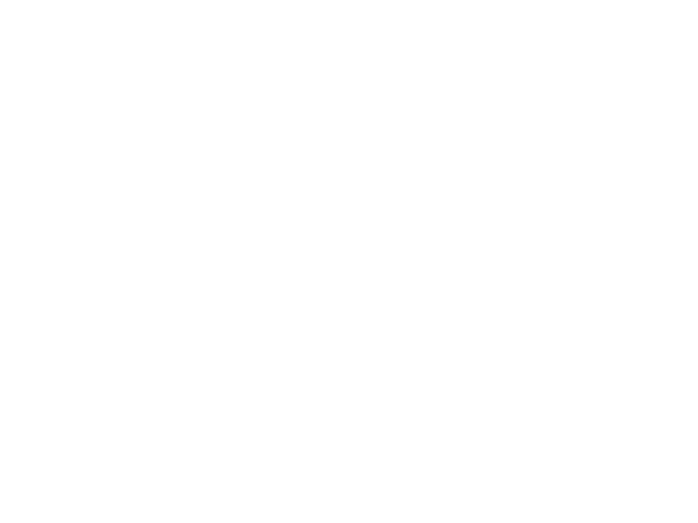

In [24]:
lith_block, fault_block, _ = gp.compute_model(interp_data, output='gravity')
gp.plot_section(geo_data, lith_block[0], 24, plot_data=False)

In [25]:
dbname = "Sandstone4"
post = gempy.UncertaintyAnalysisPYMC2.Posterior(dbname)

No GemPy model trace tallied.


In [26]:
post.change_input_data(interp_data, 150)

In [27]:
lith_block, fault_block, grav = gp.compute_model(interp_data, output='gravity')


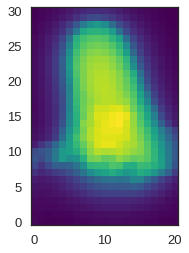

In [28]:
%matplotlib inline
plt.imshow(grav.reshape(31,21), origin='lower', cmap='viridis')

In [29]:
def plot_this(sample):
    post.change_input_data(interp_data, sample
                          )
    lith_block, fault_block, grav = gp.compute_model(interp_data, output='gravity')
    plt.imshow(grav.reshape(31,21), origin='lower', cmap='viridis')
    plt.show()
    value = ori_grav
    Forw = grav.reshape(31,21)
    #print np.median(value),np.median(Forw)
    # shifting
    # shift = np.median(-value)-np.median(Forw)
    shift = -450-np.median(Forw)#np.median(value)-np.median(Forw)
    #Forw = X_train_minmax = min_max_scaler.fit_transform(Forw, feature_range=(0, 10))



    # Calibration parameters
    F_min, F_max =  np.min(Forw), np.max(Forw)   #36.630742, 36.651496    #30.159309, 30.174104#
    F_range = F_max - F_min
    F_mid = 0.5*(F_max+F_min)

    rs_min, rs_max = np.min(value), np.max(value)
    rs_range = rs_max - rs_min
    rs_mid = 0.5*(rs_max+rs_min)

    #Rescaling

    # rs_mid + (grid - m_mid) / m_range * rs_range
    Reescaled_forw = rs_mid + (Forw - F_mid) / F_range * rs_range
    plt.imshow(Reescaled_forw - ori_grav, origin='lower', cmap='RdBu')
    plt.colorbar()
    plt.show()

In [30]:
plt.imshow(Reescaled_forw - ori_grav, origin='lower', cmap='RdBu')
plt.colorbar()

NameError: name 'Reescaled_forw' is not defined

In [27]:
grav.max(), ori_grav.max()

(12.547244, -242.00030000000001)

In [31]:
from ipywidgets import interact, IntSlider

In [33]:
interact(plot_this, sample= IntSlider(min=0,max=14000,spet=1, continuous_update=False))

A Jupyter Widget

<function __main__.plot_this>

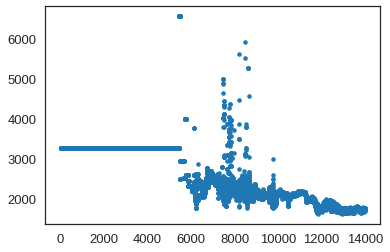

In [34]:
plt.plot(post.db.trace('e_sq')[:], '.')

# Probability plot

In [36]:
interp_data_prob = gp.InterpolatorInput(geo_data, output='geology')

Level of Optimization:  fast_run
Device:  cpu
Precision:  float32


In [38]:
lith_block, fault_block = gp.compute_model(interp_data_prob, output='geology')


In [39]:
ver, sim = gp.get_surfaces(interp_data_prob, lith_block[1], None, original_scale= False)
gp.plot_surfaces_3D_real_time(interp_data_prob, ver, sim, posterior=post, alpha=1)

IndexError: index 14000 is out of bounds for axis 0 with size 14000

In [40]:
post.compute_posterior_model(interp_data_prob, 0)

(array([[   1.        ,    1.        ,    1.        , ...,    0.        ,
            0.        ,    0.        ],
        [ 950.32958984,  950.3314209 ,  950.33355713, ...,  799.23223877,
          799.23150635,  799.23095703]], dtype=float32),
 array([], shape=(0, 125000), dtype=float32))

In [41]:
post.compute_posterior_models_all(interp_data_prob, calc_fb=False)

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.2965932327801966e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)
/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.387140650763399e-10
  ' condition number: {}'.format(rcond), RuntimeWarning)
/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.0661871142665404e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)
/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve


/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.5573729800498768e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)
/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.705158929141362e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)
/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.668079611747089e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)
/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
I

In [43]:
post.compute_entropy(interp_data_prob)

Information Entropy successfully calculated. Stored in self.ie and self.ie_total


In [47]:
gp.export_vtk_rectilinear(geo_data, post.ie)


# Entropy plot


In [52]:
post.db